In [1]:
import numpy as np
import os

In [4]:
data = np.load("/home/hansika/gem5/gem5/scripts/numpy_data_reduced/64_nodes_100/X/10.npy",  allow_pickle=True)
labels = np.load("/home/hansika/gem5/gem5/scripts/numpy_data_reduced/64_nodes_100/Y/10.npy",  allow_pickle=True)

In [5]:
data.size/900

396.0

In [11]:
data[0]

array([[101,  81,   8,   9, 625,   1,   1,   1,   2,  14,   1,   1,   1,
          2,  21,  12,  59, 106,  17, 166,   1,   1,   1,   2, 125,   1,
          1,   1,   2, 166,   1,   1,   1,   2,  90,  90,  53,   1,   1,
          1,   2, 115, 286,  96,   1,   1,   1,   2,  90,   1,   1,   1,
          2, 137,  37, 117,  14,   1,   1,   1,   2, 270,  80, 108,  31,
         14,  51, 351,  10,   1,   1,   1,   2,  13, 148,   1,   1,   1,
          2, 317,   1,   1,   1,   2,   1,  76,  15,   1,   1,   1,   2,
         97,   1,   1,   1,   1,   2,  17,   1,   1,   1,   2, 214,  26,
          1,   1,   1,   2,  85,  84,   1,   1,   1,   2, 160, 179,  46,
          1,   1,   1,   2,  91,  24,   1,   1,   1,   2,  19,   1,   1,
          1,   2,   1,  10, 141,  87,  29, 102,   1,   1,   1,   2,  16,
        112,   1,   1,   1,   2, 131,  57,  60,   1,   1,   1,   2,  47,
          1,   1,   1,   2,  16, 197,  74, 465, 148,   1,   1,   1,   2,
        122, 162,  68,  89, 121,  20,  55, 183,   1

In [13]:
data[2]

array([[ 99,  38,  89,  17,   1,   1,   1,   2,  73,   3,   1,   1,   1,
          2, 253,  96, 100,   1,   1,   1,   2,  78,  21,  12,   1,   1,
          1,   3, 130,   1,   1,   1,   2, 152,   1,   1,   1,   2,  76,
        164,   1,   1,   1,   2, 202,   1,   1,   1,   2, 198,  52,  46,
          1,   1,   1,   2, 158,   1,   1,   1,   2, 172,   1,   1,   1,
          2,  92,   1,   1,   1,   2,  45,  60,   1,   1,   1,   2,  34,
         62,  59,   1,   1,   1,   2,  72, 130,   1,   1,   1,   2, 153,
         77,   1,   1,   1,   2,   7, 279,   1,   1,   1,   2, 153, 196,
        119,  12,   1,   1,   1,   2,  19,   1,   1,   1,   2,  67,   1,
          1,   1,   2, 203,  37,  73,  32,  33,   1,   1,   1,   2, 442,
        172,  50,  87,   1, 210, 266,  15, 149, 250,  55, 185,   1,   1,
          1,   2,   6,  61, 114,  80,   1,   1,   1,   2,  23, 237,  19,
         12,   1,   1,   1,   2, 160,  35,   1,   1,   1,   2,  84, 161,
          1,   1,   1,   2, 324,  88,  72,   1,   1

In [14]:
labels[0]

1

In [11]:
labels[2]

0

In [9]:
from matplotlib import pyplot as plt 
x = np.arange(1,30) 

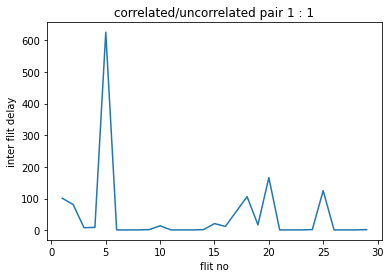

In [10]:
plt.title("correlated/uncorrelated pair 1 : 1") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[0][0][:29],"-") 
plt.show() 

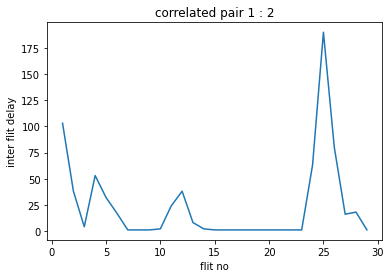

In [34]:
plt.title("correlated pair 1 : 2") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[0][1][:29],"-") 
plt.show() 

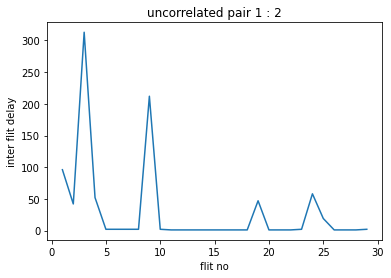

In [35]:
plt.title("uncorrelated pair 1 : 2") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[2][1][:29],"-") 
plt.show() 

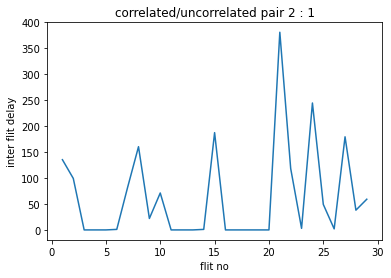

In [51]:
plt.title("correlated/uncorrelated pair 2 : 1") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[16][0][:29],"-") 
plt.show() 

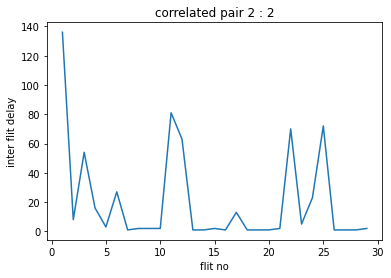

In [52]:
plt.title("correlated pair 2 : 2") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[16][1][:29],"-") 
plt.show() 

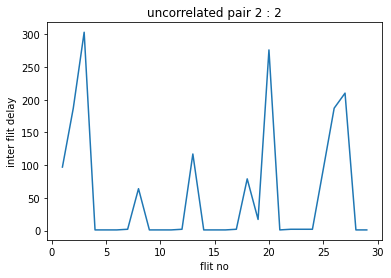

In [53]:
plt.title("uncorrelated pair 2 : 2") 
plt.xlabel("flit no") 
plt.ylabel("inter flit delay") 
plt.plot(x,data[18][1][:29],"-") 
plt.show() 

In [55]:
labels[16]

1

In [3]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data_dir, file_index):
        self.data_dir = data_dir
        self.file_index = file_index
        y = np.load(self.data_dir + "Y/" + str(self.file_index) + ".npy", allow_pickle=True)
        self.y = torch.from_numpy(y)
    
    def __getitem__(self, index):
        x = np.load(self.data_dir + "X/" + str(self.file_index) + ".npy", allow_pickle=True, mmap_mode='r')
        x = torch.from_numpy(x)
        return [x[index], self.y[index]]
    
    def __len__(self):
        return len(self.y)

In [4]:
data_set = MyDataset("/home/hansika/gem5/gem5/scripts/numpy_data_reduced/64_nodes/",0)

In [4]:
len(data_set)


396

In [49]:
data_set,data_set_1 = torch.utils.data.random_split(data_set, [100, 399068])

In [52]:
data_set[10]

[tensor([[160,   8,   1,   1,   1,   2,  25,  47,  24,  44,  11,  13,  12,  19,
           10,   1,   1,   1,   2,  67,  65, 121,  52, 187,  81, 126,  16,  27,
            1,   1,   1,   2,  21, 112, 238, 127,   1,   1,   1,   2,   1,   1,
            1,   1,   1,  48,  29,   5,   1,   1,   1,   2,  11,   1,   1,   1,
            2,   5,  60, 260, 100,   1,   1,   1,   2, 106, 113,  88,   1,   1,
            1,   2, 216,  23,   1,   1,   1,   2, 490,  64,  55,   1,   1,   1,
            2,  38,   1,   1,   1,   2,  87,  60,   1,   1,   1,   2, 163, 144,
           45,   1,   1,   1,   2, 147,  59, 212,  43,   1,   1,   1,   2,  77,
          131,   1,   1,   1,   2,  91,  13, 146,  73,   1,   1,   1,   2, 227,
           95,   1,   1,   1,   2,  37,   1,   1,   1,   2,  47, 169,   1,   1,
            1,   2,  74,  44, 478,   1,   1,   1,   1,   2, 162,   1,   1,   1,
            2,  73,   1,   1,   1,   2,  47,  56, 106,   1,   1,   1,   2,  22,
           63,   1,   1,   1,   2,   7, 

In [17]:
list_of_dataset = []
number_of_files = 41
from torch.utils.data import ConcatDataset

for i in range(number_of_files):
    list_of_dataset.append(MyDataset("/home/hansika/gem5/gem5/scripts/numpy_data_reduced/64_nodes/",i))

full_dataset = ConcatDataset(list_of_dataset)


    

In [18]:
full_dataset[1]

[tensor([[ 61, 112,  11,   4, 129,  43, 257,   1,   1,   1,   2,  49,  79,   1,
            1,   1,   2, 116, 131, 157,  93,  16, 180, 113,  25,   1,   1,   1,
            2, 154, 103,   1,   1,   1,   2, 393,  38,   1,   1,   1,   2,  16,
          124, 122,   3, 271,  58,  49,  18,  28,   9,   1,   1,   1,   2,   4,
            1,   1,   1,   2, 431,   1,   1,   1,   2, 244, 243,  58, 126,  36,
           15, 115,  64, 192, 167, 313,  67,   1,   1,   1,   2, 143,   1,   1,
            1,   2,  17, 334,   1,   1,   1,   2,  87,   1,   1,   1,   2, 292,
          225,  55,   1,   1,   1,   2,  80, 165,  27,   1,   1,   1,   2, 146,
          251,  67,  34,  44,  41,   1,   1,   1,   2, 310,  10, 214, 106,   1,
            1,   1,   2, 261,   1,   1,   1,   2,  10,   1,   1,   1,   2,  31,
            1,   1,   1,   2, 118,   1,   1,   1,   2,  98,  90, 121,   1,   1,
            1,   2,  53,   1,   1,   1,   2,  47, 148,   5,   1,   1,   1,   2,
          327,  72,  79,  98,  97,  84, 

In [19]:
len(full_dataset)

16128

In [5]:
x,y = data_set[1]

<ipython-input-2-858f4186a916>:12: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  x = torch.from_numpy(x)


In [6]:
y

tensor(1)

In [21]:
total = 0

counter_dict = {0:0, 1:0}

for data in full_dataset:
    Xs, Ys = data
    counter_dict[(int(Ys))] += 1
        
print(counter_dict)

{0: 8064, 1: 8064}


In [14]:
dummy = torch.randn(2,450).view(-1,1,2,450)

In [11]:
dummy = data_set[100][0].view(-1,1,2,450)
dummy = dummy.type(torch.FloatTensor)

In [5]:
dummy = data_set[100][0]

<ipython-input-3-858f4186a916>:12: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  x = torch.from_numpy(x)


In [6]:
data_set[100][1]

tensor(1)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# W1, W2, K1, K2 are hyper parameters that eventually needed training
W1 = 30
W2 = 10
K1= 2000
K2 = 1000

#dummy data to try the NN ( 2 arrays of size 450)
# dummy = torch.randn(2,450).view(-1,1,2,450)

# represents the whole CNN
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, K1, (2,W1), stride=(2, 1))
        self.pool1 = nn.MaxPool2d((1, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(K1, K2, (1,W2), stride=(1, 1))
        self.pool2 = nn.MaxPool2d((1, 5), stride=(1, 1))
        
        self.fc1 = nn.Linear(1000*404, 3000) # need to automate arriving at this number (1000*254)
        self.fc2 = nn.Linear(3000, 800) 
        self.fc3 = nn.Linear(800,100)
        self.fc4 = nn.Linear(100,2)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        
        x = x.view(-1, 1000*404)    
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return torch.sigmoid(x)
        

    
## ------------------------------------testing small net--------------------------- ##

# net = SmallNet()
# print(net)
# print(type(dummy))

# output = net.forward(dummy.narrow(2,0,2))
# output.shape

## --------------------------------end testing small net----------------------------- ##

## ---------------------------------------- testing net ----------------------------- ##

# net = Net()
# print(net)

# output = net.forward(dummy)
# output.shape

## -------------------------------end testing net------------------------------------ ##



# ------------------- Training the CNN ------------------------------------- ##
# For now this code is only to show the structure, I need to add data preparation and modify code accordingly.

isTraining = False
if isTraining:
   
    BATCH_SIZE = 10
    EPOCHS = 1
    
    # need to use collected data here
    trainset = torch.utils.data.DataLoader(data_set, batch_size=BATCH_SIZE, shuffle=True)
#     testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

    # learning rate of the adam optimizer should be a hyperparameter
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(EPOCHS):
        for data in trainset:
            X, y = data 
            net.zero_grad()  
            X = X.type(torch.FloatTensor)
            output = net(X.view(-1,1,2,450))
            loss = nn.CrossEntropyLoss()
            loss = loss(output, y)
            loss.backward() 
            optimizer.step()  
        print(loss)  


    correct = 0
    total = 0

    with torch.no_grad():
        for data in testset:
            X, y = data
            output = net(X.view(-1,784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    print("Accuracy: ", round(correct/total, 3))    

In [8]:
net = Net()
dummy = dummy.type(torch.FloatTensor)
output = net.forward(dummy.view(-1,1,2,450))

/home/hansika/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
output

tensor([[0.5000, 0.8159]], grad_fn=<SigmoidBackward>)

In [15]:
y = data_set[100][1]
y = torch.LongTensor([1])

In [16]:
y


tensor([1])

In [18]:
loss = nn.CrossEntropyLoss()
loss = loss(output, y)


In [19]:
loss

tensor(0.5476, grad_fn=<NllLossBackward>)

In [21]:
o = output.view(1)


In [22]:
o

tensor([0.5000], grad_fn=<ViewBackward>)

In [25]:
test = torch.FloatTensor([[0.6792],[0.6781]])


In [27]:
test.shape



torch.Size([2, 1])

In [29]:
testReshaped = test.view(2)

In [30]:
testReshaped

tensor([0.6792, 0.6781])